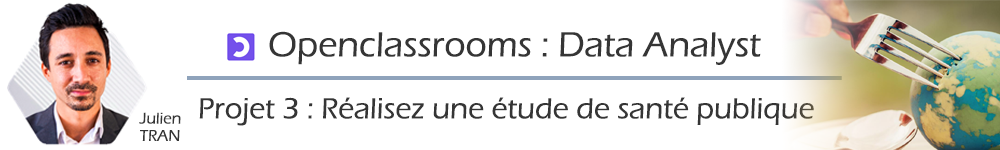

### Question 11 : En ne prenant en compte que les céréales destinées à l'alimentation (humaine et animale), quelle proportion (en termes de poids) est destinée à l'alimentation animale ?

Sélectionnez parmi les données des bilans alimentaires les informations relatives aux pays dans lesquels la FAO recense des personnes en sous-nutrition.

Repérez les 15 produits les plus exportés par ce groupe de pays.

### Sommaire // Question 11 🍌

* [1.Importation des librairies et parametres df](#1)
* [2.Importation des fichiers CSV](#2)
* [3.Nettoyage des différentes tables](#3)
    * [3.1.Population](#3.1)
        * [3.1.1.Valeurs manquantes, nulles et NA](#3.1.1)
        * [3.1.2.Doublons](#3.1.2)
    * [3.2.Vegetaux](#3.2)
        * [3.2.1.Valeurs manquantes, nulles et NA](#3.2.1)
        * [3.2.2.Doublons](#3.2.2)
    * [3.3.Animaux](#3.3)
        * [3.3.1.Valeurs manquantes, nulles et NA](#3.3.1)
        * [3.3.2.Doublons](#3.3.2)
    * [3.4.céréales](#3.4)
        * [3.4.1.Valeurs manquantes, nulles et NA](#3.4.1)
        * [3.4.2.Doublons](#3.4.2)
    * [3.5.sous_alimentation](#3.5)
        * [3.5.1.Valeurs manquantes, nulles et NA](#3.5.1)
        * [3.5.2.Doublons](#3.5.2)
* [4.Liste des produits considérés comme céréales](#4)
* [5.Proportion des céréales destinés à l'alimentation des animaux (poids)](#5)
* [6.15 produits les plus exportés dans les pays sous alimentés](#6)

## 1.Importation des librairies et parametres df <a class="anchor" id="1"></a>

In [1]:
#j'importe les librairies qui vont me servir plus tard
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2.Importation des fichiers CSV <a class="anchor" id="2"></a>

In [2]:
#Je charge tous les fichiers csv
population = pd.read_csv("C:/Users/33643/Desktop/P3/FAO_2013_fr/fr_population.csv")
animaux = pd.read_csv("C:/Users/33643/Desktop/P3/FAO_2013_fr/fr_animaux.csv")
céréales = pd.read_csv("C:/Users/33643/Desktop/P3/FAO_2013_fr/fr_céréales.csv")
sousalimentation = pd.read_csv("C:/Users/33643/Desktop/P3/FAO_2013_fr/fr_sousalimentation.csv")
vegetaux = pd.read_csv("C:/Users/33643/Desktop/P3/FAO_2013_fr/fr_vegetaux.csv")

#J'affiche une phrase si l'import est reussi
print("Fichiers chargés avec succes!") 

Fichiers chargés avec succes!


## 3.Nettoyage des différentes tables <a class="anchor" id="3"></a>

## 3.1.Population <a class="anchor" id="3.1"></a>

In [3]:
#Je jette un coup d'oeil aux 5 premieres lignes du fichier
population.head() 

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,2,Afghanistan,511,Population totale,2501,Population,2013,2013,1000 personnes,30552,NaN,Donnée officielle
1,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,202,Afrique du Sud,511,Population totale,2501,Population,2013,2013,1000 personnes,52776,NaN,Donnée officielle
2,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,3,Albanie,511,Population totale,2501,Population,2013,2013,1000 personnes,3173,NaN,Donnée officielle
3,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,4,Algérie,511,Population totale,2501,Population,2013,2013,1000 personnes,39208,NaN,Donnée officielle
4,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,79,Allemagne,511,Population totale,2501,Population,2013,2013,1000 personnes,82727,NaN,Donnée officielle


In [4]:
#Je jette un coup d'oeil aux total, moyenne, écrat min, min, max pour toutes les lignes
population.describe()  

,Code zone,Code Élément,Code Produit,Code année,Année,Valeur
count,175.000000,175.0,175.0,175.0,175.0,1.750000e+02
mean,126.720000,511.0,2501.0,2013.0,2013.0,4.807996e+04
std,75.168519,0.0,0.0,0.0,0.0,1.786327e+05
min,1.000000,511.0,2501.0,2013.0,2013.0,5.400000e+01
25%,64.500000,511.0,2501.0,2013.0,2013.0,2.543500e+03
50%,121.000000,511.0,2501.0,2013.0,2013.0,9.413000e+03
75%,188.500000,511.0,2501.0,2013.0,2013.0,2.888150e+04
max,351.000000,511.0,2501.0,2013.0,2013.0,1.416667e+06


In [5]:
#Je vérifie le nombre de colonnes et lignes
population.shape 

(175, 14)

In [6]:
#Je vérifie le nombre de valeur unique dans la colonne Valeur
len(population['Valeur'].unique()) 

175

In [7]:
#Je definis le nombre de lignes max affichées sur aucune limite
pd.set_option("max_rows", None) 

## 3.1.1.Valeurs manquantes, nulles et NA <a class="anchor" id="3.1.1"></a>

In [8]:
#Je trie la table par ordre croissant de la colonne Valeur et je drop les colonnes NaN

pop_sorted = population.sort_values(by = 'Valeur').dropna(axis=1)
pop_sorted.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Description du Symbole
143,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,188,Saint-Kitts-et-Nevis,511,Population totale,2501,Population,2013,2013,1000 personnes,54,Donnée officielle
20,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,17,Bermudes,511,Population totale,2501,Population,2013,2013,1000 personnes,65,Donnée officielle
47,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,55,Dominique,511,Population totale,2501,Population,2013,2013,1000 personnes,72,Donnée officielle
6,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,8,Antigua-et-Barbuda,511,Population totale,2501,Population,2013,2013,1000 personnes,90,Donnée officielle
89,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,83,Kiribati,511,Population totale,2501,Population,2013,2013,1000 personnes,102,Donnée officielle


#### J'ai remarqué en fin de table que la population totale de la chine etait compté deux fois.

In [9]:
print(population.isnull().values.any())
print(population.isnull().sum())

True
Code Domaine                0
Domaine                     0
Code zone                   0
Zone                        0
Code Élément                0
Élément                     0
Code Produit                0
Produit                     0
Code année                  0
Année                       0
Unité                       0
Valeur                      0
Symbole                   174
Description du Symbole      0
dtype: int64


## 3.1.2.Doublons <a class="anchor" id="3.1.2"></a>

In [10]:
print(population.duplicated().values.any())

False


In [11]:
#Je supprime la ligne doublon que j'ai repéré dans la table
population_sschine = population[population.Zone != 'Chine']

#J'en profite pour completer le nettoyage de la table, pour plus tard
population = population_sschine.drop(columns =['Code Domaine','Domaine','Code zone','Code Élément','Code Produit','Année','Code année','Unité','Symbole','Description du Symbole'])
population = population.rename(columns ={'Valeur':'Nbr habitants'})
population['Nbr habitants'] = population['Nbr habitants']*1000

population.head(5)

,Zone,Élément,Produit,Nbr habitants
0,Afghanistan,Population totale,Population,30552000
1,Afrique du Sud,Population totale,Population,52776000
2,Albanie,Population totale,Population,3173000
3,Algérie,Population totale,Population,39208000
4,Allemagne,Population totale,Population,82727000


## 3.2.Vegetaux <a class="anchor" id="3.2"></a>

In [12]:
#Je jette un coup d'oeil aux 5 premieres lignes du fichier
vegetaux.head() 

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,2,Afghanistan,5511,Production,2511,Blé,2013,2013,Milliers de tonnes,5169.0,S,Données standardisées
1,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,2,Afghanistan,5611,Importations - Quantité,2511,Blé,2013,2013,Milliers de tonnes,1173.0,S,Données standardisées
2,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,2,Afghanistan,5072,Variation de stock,2511,Blé,2013,2013,Milliers de tonnes,-350.0,S,Données standardisées
3,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé,2013,2013,Milliers de tonnes,5992.0,S,Données standardisées
4,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,2,Afghanistan,5527,Semences,2511,Blé,2013,2013,Milliers de tonnes,322.0,S,Données standardisées


In [13]:
#Je calcule le nombre d'éléments uniques dans la colonne Element de la table animaux
len((vegetaux)['Élément'].unique()) 

15

In [14]:
#Je liste le nombre d'éléments uniques dans la colonne Element de la table vegetaux
(vegetaux)['Élément'].unique() 

array(['Production', 'Importations - Quantité', 'Variation de stock',
       'Disponibilité intérieure', 'Semences', 'Pertes', 'Nourriture',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Aliments pour animaux', 'Exportations - Quantité', 'Traitement',
       'Autres utilisations (non alimentaire)'], dtype=object)

In [15]:
#Je vérifie le nombre de colonnes et lignes
vegetaux.shape

(104871, 14)

In [16]:
#Je supprime la ligne doublon que j'ai repéré dans la table
vegetaux_sschine = vegetaux[vegetaux.Zone != 'Chine']
vegetaux = vegetaux_sschine

## 3.2.1.Valeurs manquantes, nulles et NA <a class="anchor" id="3.2.1"></a>

In [17]:
print(vegetaux.isnull().values.any())

False


## 3.2.2.Doublons <a class="anchor" id="3.2.2"></a>

In [18]:
print(vegetaux.duplicated().values.any())

False


## 3.3.Animaux <a class="anchor" id="3.3"></a>

In [19]:
animaux.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,2,Afghanistan,5511,Production,2731,Viande de Bovins,2013,2013,Milliers de tonnes,134.00,S,Données standardisées
1,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,2,Afghanistan,5611,Importations - Quantité,2731,Viande de Bovins,2013,2013,Milliers de tonnes,6.00,S,Données standardisées
2,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,2,Afghanistan,5301,Disponibilité intérieure,2731,Viande de Bovins,2013,2013,Milliers de tonnes,140.00,S,Données standardisées
3,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,2,Afghanistan,5142,Nourriture,2731,Viande de Bovins,2013,2013,Milliers de tonnes,140.00,S,Données standardisées
4,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,2,Afghanistan,645,Disponibilité alimentaire en quantité (kg/pers...,2731,Viande de Bovins,2013,2013,kg,4.59,Fc,Donnée calculée


In [20]:
#Je vérifie le nombre de colonnes et lignes
animaux.shape

(37166, 14)

In [21]:
#Je supprime la ligne doublon que j'ai repéré dans la table
animaux_sschine = animaux[animaux.Zone != 'Chine']
animaux = animaux_sschine

## 3.3.1.Valeurs manquantes, nulles et NA <a class="anchor" id="3.3.1"></a>

In [22]:
print(animaux.isnull().values.any())

False


## 3.3.2.Doublons <a class="anchor" id="3.3.2"></a>

In [23]:
print(animaux.duplicated().values.any())

False


In [24]:
animaux.Valeur[animaux.Valeur < 0] = 0
animaux = animaux.replace(0, np.nan)

vegetaux.Valeur[vegetaux.Valeur < 0] = 0
vegetaux = vegetaux.replace(0, np.nan)

## 3.4.Céréales <a class="anchor" id="3.4"></a>

In [25]:
céréales.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,2,Afghanistan,5511,Production,2511,Blé,2013,2013,Milliers de tonnes,5169,S,Données standardisées
1,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,2,Afghanistan,5511,Production,2805,Riz (Eq Blanchi),2013,2013,Milliers de tonnes,342,S,Données standardisées
2,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,2,Afghanistan,5511,Production,2513,Orge,2013,2013,Milliers de tonnes,514,S,Données standardisées
3,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,2,Afghanistan,5511,Production,2514,Maïs,2013,2013,Milliers de tonnes,312,S,Données standardisées
4,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,2,Afghanistan,5511,Production,2517,Millet,2013,2013,Milliers de tonnes,13,S,Données standardisées


In [26]:
#Je vérifie le nombre de colonnes et lignes
céréales.shape

(891, 14)

In [27]:
#Je supprime la ligne doublon que j'ai repéré dans la table
céréales_sschine = céréales[céréales.Zone != 'Chine']
céréales = céréales_sschine

## 3.4.1.Valeurs manquantes, nulles et NA <a class="anchor" id="3.4.1"></a>

In [28]:
print(céréales.isnull().values.any())

False


## 3.4.2.Doublons <a class="anchor" id="3.4.2"></a>

In [29]:
print(céréales.duplicated().values.any())

False


## 3.5.Sous alimentation <a class="anchor" id="3.5"></a>

In [30]:
sousalimentation.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,FS,Données de la sécurité alimentaire,2,Afghanistan,6132,Valeur,210011,Nombre de personnes sous-alimentées (millions)...,20122014,2012-2014,millions,7.9,F,Estimation FAO,NaN
1,FS,Données de la sécurité alimentaire,2,Afghanistan,6132,Valeur,210011,Nombre de personnes sous-alimentées (millions)...,20132015,2013-2015,millions,8.8,F,Estimation FAO,NaN
2,FS,Données de la sécurité alimentaire,2,Afghanistan,6132,Valeur,210011,Nombre de personnes sous-alimentées (millions)...,20142016,2014-2016,millions,9.6,F,Estimation FAO,NaN
3,FS,Données de la sécurité alimentaire,2,Afghanistan,6132,Valeur,210011,Nombre de personnes sous-alimentées (millions)...,20152017,2015-2017,millions,10.2,F,Estimation FAO,NaN
4,FS,Données de la sécurité alimentaire,2,Afghanistan,6132,Valeur,210011,Nombre de personnes sous-alimentées (millions)...,20162018,2016-2018,millions,10.6,F,Estimation FAO,NaN


In [31]:
#Je vérifie le nombre de colonnes et lignes
sousalimentation.shape

(1020, 15)

In [32]:
#Je supprime la ligne doublon que j'ai repéré dans la table
sousalimentation_sschine = sousalimentation[sousalimentation.Zone != 'Chine']
sousalimentation = sousalimentation_sschine

## 3.5.1.Valeurs manquantes, nulles et NA <a class="anchor" id="3.4.1"></a>

In [33]:
sousalimentation = sousalimentation.replace('<0.1', np.nan)

In [34]:
print(sousalimentation.isnull().sum())

Code Domaine                 0
Domaine                      0
Code zone                    0
Zone                         0
Code Élément                 0
Élément                      0
Code Produit                 0
Produit                      0
Code année                   0
Année                        0
Unité                        0
Valeur                     530
Symbole                      0
Description du Symbole       0
Note                      1015
dtype: int64


In [35]:
sousalim_null = sousalimentation[sousalimentation['Valeur'].isnull()]
sousalim_null.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
20,FS,Données de la sécurité alimentaire,79,Allemagne,6132,Valeur,210011,Nombre de personnes sous-alimentées (millions)...,20122014,2012-2014,millions,NaN,NR,Non rapportée,NaN
21,FS,Données de la sécurité alimentaire,79,Allemagne,6132,Valeur,210011,Nombre de personnes sous-alimentées (millions)...,20132015,2013-2015,millions,NaN,NR,Non rapportée,NaN
22,FS,Données de la sécurité alimentaire,79,Allemagne,6132,Valeur,210011,Nombre de personnes sous-alimentées (millions)...,20142016,2014-2016,millions,NaN,NR,Non rapportée,NaN
23,FS,Données de la sécurité alimentaire,79,Allemagne,6132,Valeur,210011,Nombre de personnes sous-alimentées (millions)...,20152017,2015-2017,millions,NaN,NR,Non rapportée,NaN
24,FS,Données de la sécurité alimentaire,79,Allemagne,6132,Valeur,210011,Nombre de personnes sous-alimentées (millions)...,20162018,2016-2018,millions,NaN,NR,Non rapportée,NaN


In [36]:
#Je trouve pas mal de NaN dans la table, ils seront traités plus bas quand une somme de la colonne sera necessaire, ils seront transformés de sorte à pouvoir faire la somme

## 3.5.2.Doublons <a class="anchor" id="3.5.2"></a>

In [37]:
print(sousalimentation.duplicated().values.any())

False


## 4.Liste des produits considérés comme céréales <a class="anchor" id="4"></a>

In [38]:
#Je check le nombre de produits uniques

len(céréales['Produit'].unique()) 

9

In [39]:
#J'établis la liste des produits avec leur code

céréales_pivot = céréales.pivot_table(index = ['Produit', 'Code Produit'], aggfunc = np.sum, fill_value = 0)

#Je drop les colonnes qui ne m'interessent pas

céréales_pivot = céréales_pivot.drop(columns =[('Année'),('Code zone'),('Code Élément'),('Valeur'),('Code année')])

céréales_pivot.reset_index(drop=False)

céréales_pivot

,
Produit,Code Produit
Avoine,2516
Blé,2511
"Céréales, Autres",2520
Maïs,2514
Millet,2517
Orge,2513
Riz (Eq Blanchi),2805
Seigle,2515
Sorgho,2518


In [40]:
#Je concatene les tables animaux et vegetaux, elles contiennent des informations complémentaires

animaux_vegetaux = pd.concat([animaux, vegetaux])

#Je merge les tables animaux_vegetaux et céréales

animaux_vegetaux_céréales_pivot = pd.merge(animaux_vegetaux, céréales_pivot, on= ('Produit','Code Produit'), how= 'inner')

animaux_vegetaux_céréales_pivot.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,2,Afghanistan,5511,Production,2511,Blé,2013,2013,Milliers de tonnes,5169.0,S,Données standardisées
1,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,2,Afghanistan,5611,Importations - Quantité,2511,Blé,2013,2013,Milliers de tonnes,1173.0,S,Données standardisées
2,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,2,Afghanistan,5072,Variation de stock,2511,Blé,2013,2013,Milliers de tonnes,NaN,S,Données standardisées
3,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé,2013,2013,Milliers de tonnes,5992.0,S,Données standardisées
4,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,2,Afghanistan,5527,Semences,2511,Blé,2013,2013,Milliers de tonnes,322.0,S,Données standardisées


## 5.Proportion des céréales destinés à l'alimentation des animaux (poids) <a class="anchor" id="5"></a>

In [41]:
#Je check mes elements

animaux_vegetaux_céréales_pivot['Élément'].unique()

array(['Production', 'Importations - Quantité', 'Variation de stock',
       'Disponibilité intérieure', 'Semences', 'Pertes', 'Nourriture',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Exportations - Quantité', 'Aliments pour animaux', 'Traitement',
       'Autres utilisations (non alimentaire)'], dtype=object)

In [42]:
#Je check mes produits

animaux_vegetaux_céréales_pivot['Produit'].unique()

array(['Blé', 'Riz (Eq Blanchi)', 'Orge', 'Maïs', 'Millet',
       'Céréales, Autres', 'Seigle', 'Avoine', 'Sorgho'], dtype=object)

In [43]:
#Je localise mes aliments pour animaux pour en sortir la somme de cette quantité

animaux_vegetaux_céréales_pivot['Valeur'] = animaux_vegetaux_céréales_pivot['Valeur']

céréales_alim_animal = animaux_vegetaux_céréales_pivot.loc[(animaux_vegetaux_céréales_pivot['Élément'] == 'Aliments pour animaux'),'Valeur']

print("La quantité de céréales destinée à l'alimentation animale est de",céréales_alim_animal.sum(), 'milliers de tonnes')

La quantité de céréales destinée à l'alimentation animale est de 873535.0 milliers de tonnes


In [44]:
#Je localise les lignes et colonnes qui m'interessent

céréales_tot_q11 = animaux_vegetaux_céréales_pivot.loc[(vegetaux['Élément'] == 'Production') + (vegetaux['Élément'] == 'Importations - Quantité') + (vegetaux['Élément'] == 'Variation de stock'),'Valeur']

print("La quantité totale de céréales est de",céréales_tot_q11.sum().astype('int64'), 'milliers de tonnes')

La quantité totale de céréales est de 2226924 milliers de tonnes


C:\Users\33643\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:204: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  warnings.warn(


In [45]:
Proportion_q11 = (céréales_alim_animal.sum() / céréales_tot_q11.sum())*100

print("La proportion de céréales destinées à l'alimentation animal par rapport à la quantité totale de céréale est de")
print(Proportion_q11.sum().astype('int64'), '%')

La proportion de céréales destinées à l'alimentation animal par rapport à la quantité totale de céréale est de
39 %


## 6.15 produits les plus exportés dans les pays sous alimentés <a class="anchor" id="6"></a>

In [46]:
#Je drop les lignes qui ne m'interessent pas, années & valeur = 0

sousalimentation = sousalimentation[sousalimentation['Année'].isin(['2012-2014'])]

sousalimentation_drop = sousalimentation.drop(sousalimentation.loc[sousalimentation['Valeur'] == '0'].index, inplace = True)

sousalimentation.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,FS,Données de la sécurité alimentaire,2,Afghanistan,6132,Valeur,210011,Nombre de personnes sous-alimentées (millions)...,20122014,2012-2014,millions,7.9,F,Estimation FAO,NaN
5,FS,Données de la sécurité alimentaire,202,Afrique du Sud,6132,Valeur,210011,Nombre de personnes sous-alimentées (millions)...,20122014,2012-2014,millions,2.6,F,Estimation FAO,NaN
10,FS,Données de la sécurité alimentaire,3,Albanie,6132,Valeur,210011,Nombre de personnes sous-alimentées (millions)...,20122014,2012-2014,millions,0.2,F,Estimation FAO,NaN
15,FS,Données de la sécurité alimentaire,4,Algérie,6132,Valeur,210011,Nombre de personnes sous-alimentées (millions)...,20122014,2012-2014,millions,1.7,F,Estimation FAO,NaN
20,FS,Données de la sécurité alimentaire,79,Allemagne,6132,Valeur,210011,Nombre de personnes sous-alimentées (millions)...,20122014,2012-2014,millions,NaN,NR,Non rapportée,NaN


In [47]:
#J'etablis la liste des pays qui comptent des personnes sous alimentées

sousalimentation_pays_q11 = sousalimentation.groupby('Zone')['Valeur'].sum()

sousalimentation_pays_q11.head()

Zone
Afghanistan       7.9
Afrique du Sud    2.6
Albanie           0.2
Algérie           1.7
Allemagne           0
Name: Valeur, dtype: object

In [48]:
#Je concatene les tables animaux et vegetaux, elles contiennent des informations complémentaires

animaux_vegetaux = pd.concat([animaux, vegetaux])

In [49]:
#Je drop les lignes qui ne m'interessent pas pour ne garder que les exportations

animaux_vegetaux = animaux_vegetaux[~animaux_vegetaux["Élément"].isin(['Production','Importations - Quantité','Disponibilité intérieure', 'Nourriture','Disponibilité alimentaire en quantité (kg/personne/an)','Disponibilité alimentaire (Kcal/personne/jour)','Disponibilité de protéines en quantité (g/personne/jour)','Disponibilité de matière grasse en quantité (g/personne/jour)','Semences', 'Pertes','Aliments pour animaux', 'Autres utilisations (non alimentaire)',
       'Variation de stock', 'Traitement'])]

In [50]:
(animaux_vegetaux)['Élément'].unique()

array(['Exportations - Quantité'], dtype=object)

In [51]:
#Je merge les tables animaux_vegetaux et population

animaux_vegetaux_ssalim = pd.merge(animaux_vegetaux, sousalimentation_pays_q11, on= 'Zone')

animaux_vegetaux_ssalim.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur_x,Symbole,Description du Symbole,Valeur_y
0,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,2,Afghanistan,5911,Exportations - Quantité,2848,Lait - Excl Beurre,2013,2013,Milliers de tonnes,NaN,S,Données standardisées,7.9
1,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,2,Afghanistan,5911,Exportations - Quantité,2514,Maïs,2013,2013,Milliers de tonnes,NaN,S,Données standardisées,7.9
2,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,2,Afghanistan,5911,Exportations - Quantité,2531,Pommes de Terre,2013,2013,Milliers de tonnes,41.0,S,Données standardisées,7.9
3,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,2,Afghanistan,5911,Exportations - Quantité,2745,Miel,2013,2013,Milliers de tonnes,NaN,S,Données standardisées,7.9
4,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,2,Afghanistan,5911,Exportations - Quantité,2549,Légumineuses Autres,2013,2013,Milliers de tonnes,NaN,S,Données standardisées,7.9


In [52]:
#Je créé une table pivot avec les informations qui m'interessent

animaux_vegetaux_ssalim_pivot = animaux_vegetaux_ssalim.pivot_table(values = ['Valeur_x'], index = ['Zone', 'Élément','Produit'], aggfunc = np.sum, fill_value = 0)

animaux_vegetaux_ssalim_pivot.head()

Valeur_x
Zone        Élément                 Produit                     
Afghanistan Exportations - Quantité Agrumes, Autres            2
                                    Fruits, Autres            69
                                    Graines de coton           0
                                    Lait - Excl Beurre         0
                                    Légumes, Autres           34

In [53]:
#Je groupe les produits ensemble

animaux_vegetaux_ssalim_pivot = animaux_vegetaux_ssalim_pivot.groupby(level='Produit').sum()

animaux_vegetaux_ssalim_pivot.head()

,Valeur_x
Produit,
Abats Comestible,4926
"Agrumes, Autres",830
"Alcool, non Comestible",9900
Aliments pour enfants,1012
Ananas,7670


In [55]:
#J'ordonnne ma table dans l'ordre decroissant

animaux_vegetaux_ssalim_pivot_sorted = animaux_vegetaux_ssalim_pivot.sort_values(by = 'Valeur_x',ascending = False).dropna(axis=1)

animaux_vegetaux_ssalim_pivot_sorted.head()

,Valeur_x
Produit,
Blé,198380
Maïs,128787
Lait - Excl Beurre,125098
Soja,106912
Sucre Eq Brut,68320


In [57]:
#J'affiche les 15 produits les plus exportés parmi la liste des pays présentant une population en sous alimentation

produits_exp_Q11 = animaux_vegetaux_ssalim_pivot_sorted.iloc[0:15, 0]

print ('Les 15 produits les plus exportés sont :')
print (produits_exp_Q11.astype('int64').to_string(header= False), 'Milliers de tonnes')

Les 15 produits les plus exportés sont :
Blé                    198380
Maïs                   128787
Lait - Excl Beurre     125098
Soja                   106912
Sucre Eq Brut           68320
Huile de Palme          50673
Légumes, Autres         44535
Orge                    41585
Riz (Eq Blanchi)        41445
Oranges, Mandarines     37489
Manioc                  36052
Fruits, Autres          30165
Pommes de Terre         29259
Poissons Pelagiques     23134
Tomates                 21987 Milliers de tonnes
